In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Passenger_Satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Distance                           103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Column names and descriptions

In [4]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Distance                               0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### drop the null values

In [5]:
df.drop(columns = "Unnamed: 0",axis = 0,inplace = True)

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Distance                             0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

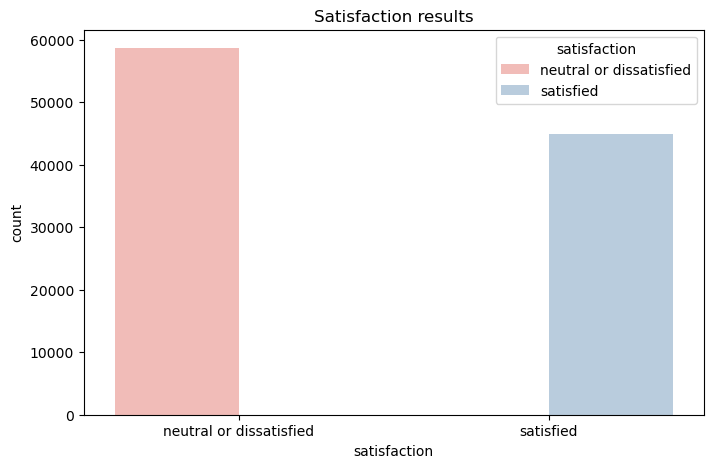

In [8]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="satisfaction", data = df, hue ="satisfaction", palette ="Pastel1" )
plt.title("Satisfaction results")

plt.show()

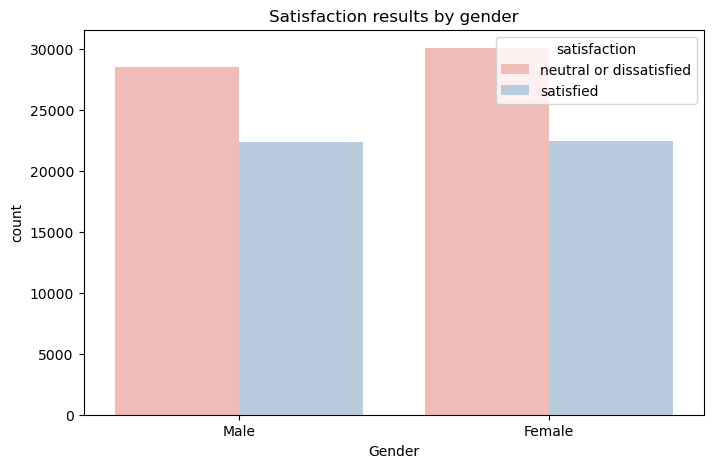

In [9]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Pastel1" )
plt.title("Satisfaction results by gender")

plt.show()

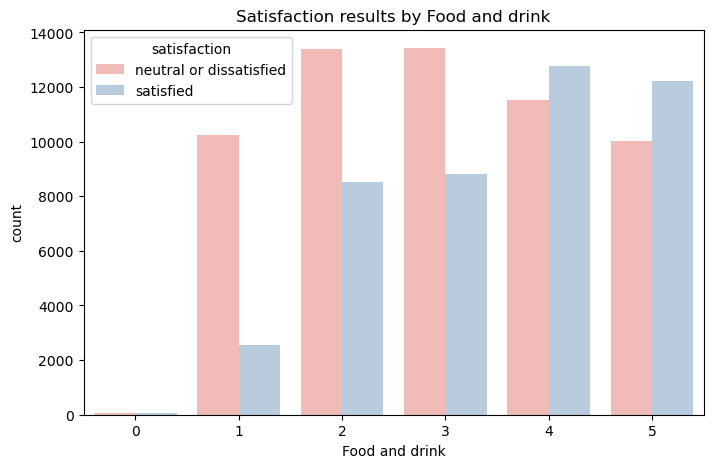

In [10]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Food and drink", data = df, hue ="satisfaction",palette ="Pastel1" )
plt.title("Satisfaction results by Food and drink")

plt.show()

## Encoding Target Column Manually

In [11]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [12]:
df["satisfaction"].replace("neutral or dissatisfied",0,inplace = True)

In [13]:
df["satisfaction"].replace("satisfied",1,inplace = True)

In [14]:
df["satisfaction"].value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

### Check Outliers

<Axes: xlabel='satisfaction'>

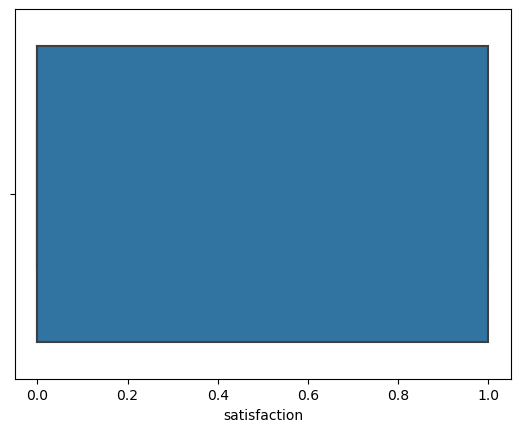

In [15]:
sns.boxplot(data= df,x = "satisfaction")

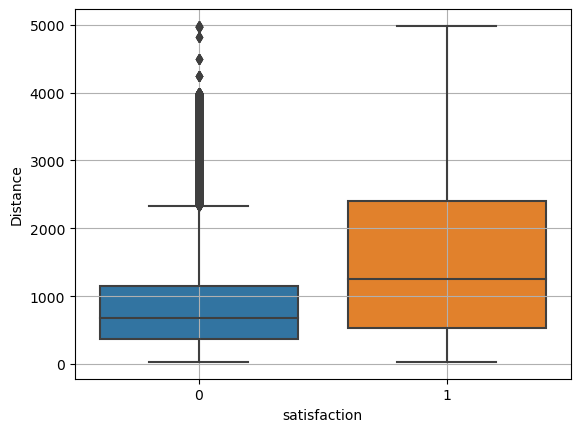

In [16]:
sns.boxplot(data= df,x = "satisfaction" , y = "Distance")
plt.grid()

### Remove the Outliers

In [17]:
df[(df["Distance"] > 1700) & (df["satisfaction"] == 0)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
23,114090,Female,Loyal Customer,58,Personal Travel,Eco,2139,4,5,4,...,4,4,4,4,2,4,2,0,0.0,0
28,118319,Female,Loyal Customer,36,Business travel,Business,3347,3,1,1,...,3,3,3,3,2,3,2,18,12.0,0
29,75460,Male,Loyal Customer,22,Personal Travel,Eco,2342,3,2,3,...,3,2,4,3,4,2,3,19,0.0,0
92,6012,Male,Loyal Customer,30,Business travel,Business,1896,4,1,1,...,4,2,2,3,4,2,4,81,72.0,0
96,123589,Female,Loyal Customer,39,Personal Travel,Eco,1773,4,5,4,...,5,2,2,3,3,1,5,14,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103866,62394,Female,Loyal Customer,14,Personal Travel,Eco,2704,1,2,1,...,3,1,3,2,1,3,3,0,4.0,0
103878,15176,Male,Loyal Customer,37,Business travel,Business,2445,4,5,5,...,4,4,4,4,4,4,1,1,0.0,0
103886,92323,Male,disloyal Customer,36,Business travel,Business,2556,3,3,3,...,5,5,4,5,5,5,5,2,13.0,0
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0


In [18]:
i = df[(df["Distance"] > 1700) & (df["satisfaction"] == 0)].index

In [19]:
df.drop(i, axis = 0, inplace = True)


### Seperate the columns into x and y 

In [20]:
x = df.iloc[:,:-1]
x.shape

(94878, 23)

In [21]:
y = df.iloc[:,-1]
y.shape

(94878,)

## Encoding

In [22]:
cat_col = x.select_dtypes(object).columns

In [23]:
cat_col

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x[cat_col] = oe.fit_transform(x[cat_col])

In [25]:
x

,id,Gender,Customer Type,Age,Type of Travel,Class,Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,1.0,0.0,13,1.0,2.0,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,1.0,1.0,25,0.0,0.0,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,0.0,0.0,26,0.0,0.0,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,0.0,0.0,25,0.0,0.0,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,1.0,0.0,61,0.0,0.0,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103897,102203,0.0,0.0,60,0.0,0.0,1599,5,5,5,...,4,4,4,4,4,4,4,4,9,7.0
103898,60666,1.0,0.0,50,1.0,1.0,1620,3,1,3,...,2,2,4,3,4,2,4,2,0,0.0
103899,94171,0.0,1.0,23,0.0,1.0,192,2,1,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,73097,1.0,0.0,49,0.0,0.0,2347,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0


### Split the data into training and testing

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

## 1 -  Predicting the data using Logistics Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [28]:
### Evaluate the model

In [29]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.795004215851602
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     10058
           1       0.77      0.80      0.79      8918

    accuracy                           0.80     18976
   macro avg       0.79      0.80      0.79     18976
weighted avg       0.80      0.80      0.80     18976



We have achieved an Average Accuracy of 80 % which is not that good. Lets see if we can increase this accuracy by hyper tuning

### HPT

In [30]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [31]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.8808494940978078
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10058
           1       0.89      0.85      0.87      8918

    accuracy                           0.88     18976
   macro avg       0.88      0.88      0.88     18976
weighted avg       0.88      0.88      0.88     18976



By using liblinear we get Accuracy of 88% 

In [32]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [33]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.8875948566610455
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10058
           1       0.90      0.85      0.88      8918

    accuracy                           0.89     18976
   macro avg       0.89      0.89      0.89     18976
weighted avg       0.89      0.89      0.89     18976



By using liblinear we get Accuracy of 89% 

## 2 - Predicting the data using KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)   # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

Evaluate the model

In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.7267074198988196


By using KNN CLASSIFIER we get 72% accuracy which is not good 

## 3 - Predicting the data using Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [37]:
dt = DecisionTreeClassifier()

In [38]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
    return model

In [39]:
mymodel(dt)

0.9485139123102867
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10058
           1       0.94      0.95      0.95      8918

    accuracy                           0.95     18976
   macro avg       0.95      0.95      0.95     18976
weighted avg       0.95      0.95      0.95     18976



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 95% which is good but lets check whether we get more accurcy by hyper tunning

ploting decision tree

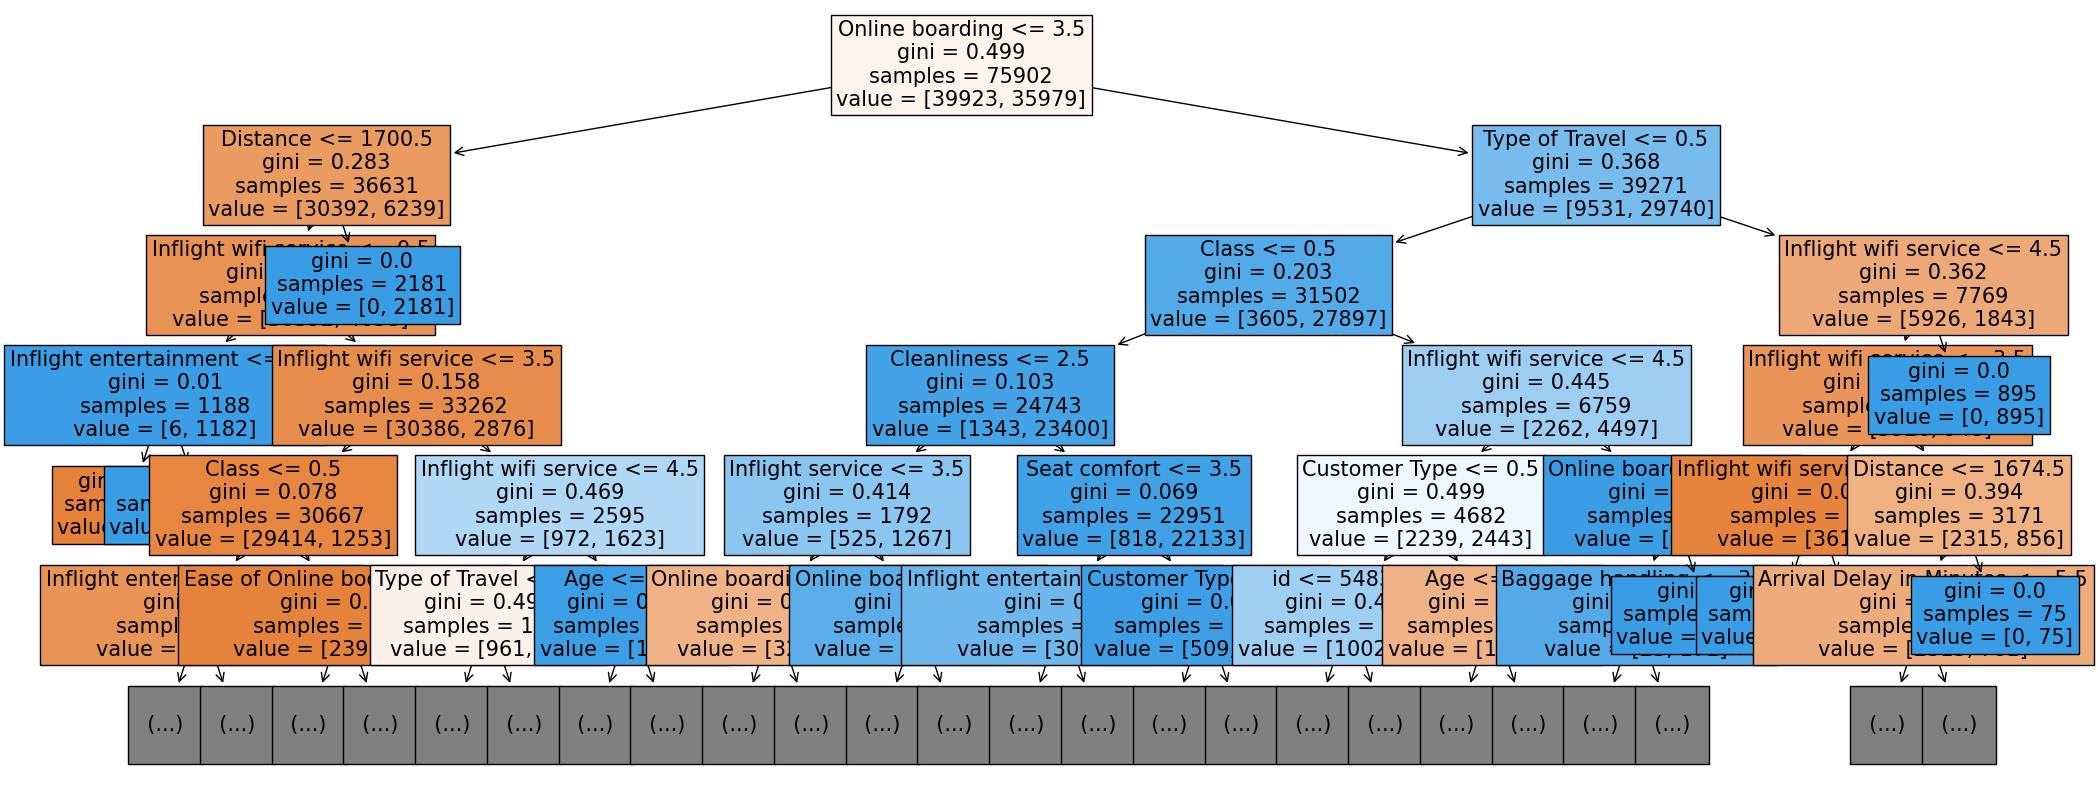

In [40]:
from sklearn import tree
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt,max_depth = 5,feature_names = x.columns,filled = True , fontsize = 15)
plt.savefig("DecisionTree.jpg")

checking accuracy of train and test

In [41]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.9485139123102867


train acc is high and test acc is low

low bias high varience

### Hyper Tunning the Decision Tree

### i - max_depth

In [42]:
for i in range(20,35):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.9526243676222597
max_depth = 21 accuracy : 0.9522027824620574
max_depth = 22 accuracy : 0.9519392917369308
max_depth = 23 accuracy : 0.9507272344013491
max_depth = 24 accuracy : 0.951254215851602
max_depth = 25 accuracy : 0.9505691399662732
max_depth = 26 accuracy : 0.9496732715008431
max_depth = 27 accuracy : 0.9495678752107926
max_depth = 28 accuracy : 0.9492516863406408
max_depth = 29 accuracy : 0.9489881956155143
max_depth = 30 accuracy : 0.949462478920742
max_depth = 31 accuracy : 0.948039629005059
max_depth = 32 accuracy : 0.9486720067453626
max_depth = 33 accuracy : 0.948935497470489
max_depth = 34 accuracy : 0.9494097807757167


In [43]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.9506745362563238
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10058
           1       0.95      0.94      0.95      8918

    accuracy                           0.95     18976
   macro avg       0.95      0.95      0.95     18976
weighted avg       0.95      0.95      0.95     18976



DecisionTreeClassifier(max_depth=24)

By using Decision Tree Max Depth function we achive the accuracy of 95%

In [44]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9939790782851572 
 test score : 0.9506745362563238


### ii - min_samples_split

In [45]:
for i in range(90,110):
    dt3 = DecisionTreeClassifier(min_samples_split = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 90 accuracy : 0.9568929173693086
max_depth = 91 accuracy : 0.9571037099494097
max_depth = 92 accuracy : 0.9570510118043845
max_depth = 93 accuracy : 0.9569983136593592
max_depth = 94 accuracy : 0.9569456155143339
max_depth = 95 accuracy : 0.9570510118043845
max_depth = 96 accuracy : 0.9569456155143339
max_depth = 97 accuracy : 0.9563132377740303
max_depth = 98 accuracy : 0.9563659359190556
max_depth = 99 accuracy : 0.9565240303541316
max_depth = 100 accuracy : 0.9565240303541316
max_depth = 101 accuracy : 0.9557335581787522
max_depth = 102 accuracy : 0.9557335581787522
max_depth = 103 accuracy : 0.9556808600337268
max_depth = 104 accuracy : 0.9556808600337268
max_depth = 105 accuracy : 0.9556808600337268
max_depth = 106 accuracy : 0.955891652613828
max_depth = 107 accuracy : 0.9554173693086003
max_depth = 108 accuracy : 0.9546795952782462
max_depth = 109 accuracy : 0.9547849915682968


In [46]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.9571037099494097
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10058
           1       0.97      0.94      0.95      8918

    accuracy                           0.96     18976
   macro avg       0.96      0.96      0.96     18976
weighted avg       0.96      0.96      0.96     18976



DecisionTreeClassifier(min_samples_split=92)

In [47]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9648362361993096 
 test score : 0.9571037099494097


By using Decision Tree Min Sample Split function we achive the accuracy of 96%

### iii - min_samples_leaf

In [48]:
for i in range(30,50):
    dt5 = DecisionTreeClassifier(min_samples_leaf = i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 30 accuracy : 0.9530459527824621
max_depth = 31 accuracy : 0.9536256323777403
max_depth = 32 accuracy : 0.9537310286677909
max_depth = 33 accuracy : 0.9536783305227656
max_depth = 34 accuracy : 0.9533621416526138
max_depth = 35 accuracy : 0.9527824620573356
max_depth = 36 accuracy : 0.9530986509274874
max_depth = 37 accuracy : 0.9537310286677909
max_depth = 38 accuracy : 0.9532567453625632
max_depth = 39 accuracy : 0.9532040472175379
max_depth = 40 accuracy : 0.9533094435075885
max_depth = 41 accuracy : 0.9539418212478921
max_depth = 42 accuracy : 0.9529932546374368
max_depth = 43 accuracy : 0.9529405564924115
max_depth = 44 accuracy : 0.9528878583473862
max_depth = 45 accuracy : 0.9525716694772344
max_depth = 46 accuracy : 0.9524662731871838
max_depth = 47 accuracy : 0.951254215851602
max_depth = 48 accuracy : 0.9509907251264755
max_depth = 49 accuracy : 0.9507799325463744


In [49]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.9528878583473862
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10058
           1       0.96      0.94      0.95      8918

    accuracy                           0.95     18976
   macro avg       0.95      0.95      0.95     18976
weighted avg       0.95      0.95      0.95     18976



DecisionTreeClassifier(min_samples_leaf=44)

In [50]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9563384364048378 
 test score : 0.9528878583473862


By using Decision Tree min_samples_leaf function we achive the accuracy of 95%

## 4 - Predicting the data using Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10058
           1       0.98      0.94      0.96      8918

    accuracy                           0.96     18976
   macro avg       0.96      0.96      0.96     18976
weighted avg       0.96      0.96      0.96     18976



By using Random Forest we get 96% of accuracy.

## 5. Predicting the data using Boosting

### i - Adaboost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10058
           1       0.95      0.93      0.94      8918

    accuracy                           0.94     18976
   macro avg       0.94      0.94      0.94     18976
weighted avg       0.94      0.94      0.94     18976



By using AdaBoost Classifier we get 94% of accuracy 

### ii - Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10058
           1       0.96      0.94      0.95      8918

    accuracy                           0.95     18976
   macro avg       0.95      0.95      0.95     18976
weighted avg       0.95      0.95      0.95     18976



By using Gradient Boosting algorithm we get 95% of accuracy

### iii - XG Boosting

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10058
           1       0.97      0.95      0.96      8918

    accuracy                           0.96     18976
   macro avg       0.96      0.96      0.96     18976
weighted avg       0.96      0.96      0.96     18976



By using XG Boost algorithm we get 96% of accuracy

## 6. Predicting the data using Encemble Learning

### i - Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     10058
           1       0.75      0.75      0.75      8918

    accuracy                           0.76     18976
   macro avg       0.76      0.76      0.76     18976
weighted avg       0.76      0.76      0.76     18976



By using Bagging Classifier on Logostic Regression we get 77% of accuracy which is not good for prediction

In [52]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10058
           1       0.97      0.94      0.96      8918

    accuracy                           0.96     18976
   macro avg       0.96      0.96      0.96     18976
weighted avg       0.96      0.96      0.96     18976



By using Bagging Classifier on Decision Tree we get 96% of accuracy.``

In [53]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [54]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models)   # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     10058
           1       0.97      0.77      0.86      8918

    accuracy                           0.88     18976
   macro avg       0.90      0.87      0.88     18976
weighted avg       0.89      0.88      0.88     18976



In [55]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft')   # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10058
           1       0.94      0.94      0.94      8918

    accuracy                           0.95     18976
   macro avg       0.95      0.95      0.95     18976
weighted avg       0.95      0.95      0.95     18976



By using Voting Classifier we get 88% And 95% of  of accuracy 

# Conclusion

## Based on the above accuracy scores, we should go ahead with decsion tree , random forest or extream gradient boosting (XG Boost).